<img src="http://i.imgur.com/0dywhdR.png" >
# [FAQ] matplotlib: 차트의 내부를 채우려면?
* Q: 라인 차트에서 라인 사이를 특정한 색으로 채우고 싶습니다.
* A: fill_between() 함수를 활용하시면 됩니다.

<!-- TEASER_END -->

fill_between() 함수를 사용하여 차트의 내부를 채우거나 두 개의 선분을 사이를 특정한 색으로 채워 강조할 수 있다.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 

# 2016년 1년간 KOSPI 지수

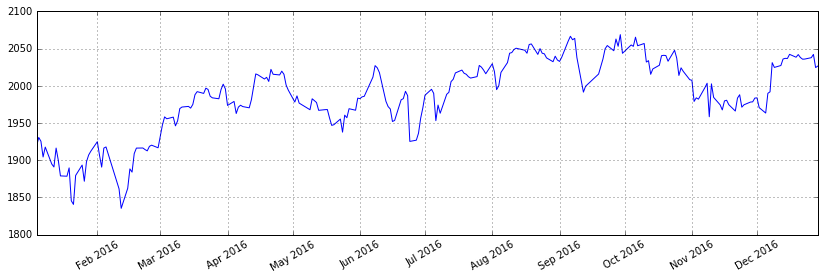

In [2]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data

start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)

df = data.get_data_yahoo('^KS11', start, end)
plt.plot(df['Adj Close'])
plt.xticks(rotation=30)
plt.show()

# fill_between()

fill_between() 내부를 채운다.

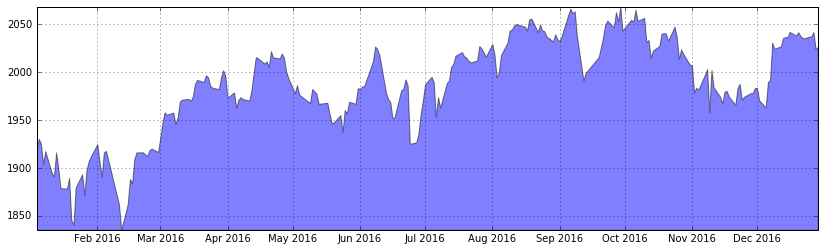

In [3]:
ymin = df['Adj Close'].min()
ymax = df['Adj Close'].max()

plt.ylim(ymin, ymax)
plt.fill_between(df.index, ymin, df['Adj Close'], alpha=0.5)

# fill_between() 활용
두 개의 데이터 값 사이를 다른 색상을 채우도록 할 수 있다. 
예를 들어, 10일 이동평균(df['ma10'])과 수정종가(df['Adj Close']) 두 데이터 사이를 크기 비교하여 지정된 색으로 채울 수 있다.

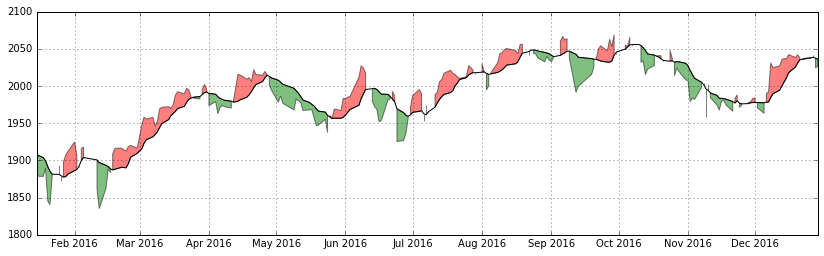

In [4]:
# 10일 이동평균
df['ma10'] = pd.rolling_mean(df['Adj Close'], 10)

plt.plot(df['ma10'], color='k')

# 10일 이동평균 대비 가격이
# 낮으면 파란색, 높으면 빨간색을 채우기
plt.fill_between(df.index, df['ma10'], df['Adj Close'], where=df['Adj Close'] >= df['ma10'], facecolor='red', alpha=0.5)
plt.fill_between(df.index, df['ma10'], df['Adj Close'], where=df['Adj Close'] < df['ma10'], facecolor='green', alpha=0.5)

#### 2016, 2017 [facebook.com/financedata](https://facebook.com/financedata)